In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)
pack_cuda._ensure_initialized()


local
local
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, used 1 barriers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compile time = 23.161 ms
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas

In [2]:
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)
pack_cuda._ensure_initialized()
import pack_cuda_lut
pack_cuda_lut._ensure_initialized()
import lap_batch
lap_batch._ensure_initialized()


Compiling CUDA LUT kernel (USE_TEXTURE=True, one-time only)
Detected GPU compute capability: 89 (arch=sm_89)
Compiling: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -lineinfo -arch=sm_89 -cubin /mnt/d//packing/temp/pack_cuda_lut_saved.cu -o /mnt/d//packing/temp/pack_cuda_lut.cubin
/mnt/d//packing/temp/pack_cuda_lut_saved.cu:5: warning: "M_PI" redefined
    5 | #define M_PI 3.14159265358979323846f
      | 
In file included from /usr/include/c++/13/cmath:47,
                 from /usr/include/c++/13/math.h:36,
                 from /usr/local/cuda/bin/../targets/x86_64-linux/include/crt/math_functions.h:4577,
                 from /usr/local/cuda/bin/../targets/x86_64-linux/include/crt/common_functions.h:303,
                 from /usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime.h:117,
                 from <command-line>:
/usr/include/math.h:1152: note: this is the location of the previous definition
 1152 |

In [3]:
%load_ext pyinstrument

In [4]:

import pack_ga3
import time
runner = pack_ga3.baseline()
runner.ga.do_legalize = False
runner.ga.ga_base.do_legalize = False
runner.ga.ga_base.N_trees_to_do = 156
runner.n_generations = 5
print(type(runner.rough_relaxers[0].cost.costs[2]))
runner.rough_relaxers[0].cost.costs[2].use_lookup_table = True
runner.rough_relaxers[0].cost.costs[2]._ensure_lut_initialized()
runner.fine_relaxers[0].cost.costs[2].use_lookup_table = True
runner.fine_relaxers[0].cost.costs[2]._ensure_lut_initialized()


<class 'pack_cost.CollisionCostOverlappingArea'>
Building lookup table for CollisionCostOverlappingArea...
Building LUT: 700 x 700 x 700 = 343,000,000 grid points
  Processing theta 1/700
  Processing theta 51/700
  Processing theta 101/700
  Processing theta 151/700
  Processing theta 201/700
  Processing theta 251/700
  Processing theta 301/700
  Processing theta 351/700
  Processing theta 401/700
  Processing theta 451/700
  Processing theta 501/700
  Processing theta 551/700
  Processing theta 601/700
  Processing theta 651/700
Cost range: [0.000000, 0.242892]
Trimming zero edges:
  X: 700 -> 562 (removed 138)
  Y: 700 -> 652 (removed 48)
  Theta: 700 -> 700 (removed 0)
  Total reduction: 25.2% (86,503,200 points)
Building lookup table for CollisionCostSeparation...
Building LUT: 700 x 700 x 700 = 343,000,000 grid points
  Processing theta 1/700
  Processing theta 51/700
  Processing theta 101/700
  Processing theta 151/700
  Processing theta 201/700
  Processing theta 251/700
  Pr

/mnt/d/packing/code/analysis/../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


Generation 0: Best costs = [[0.339005, 1.722308]]
Generation 1: Best costs = [[0.339005, 0.915232]]
Generation 2: Best costs = [[0.339005, 0.651388]]
Generation 3: Best costs = [[0.339005, 0.56709]]
Generation 4: Best costs = [[0.339005, 0.492982]]
Elapsed time: 17.42855167388916


_     ._   __/__   _ _  _  _ _/_   Recorded: 17:50:30  Samples:  11601
 /_//_/// /_\ / //_// / //_'/ //     Duration: 17.429    CPU time: 16.934
/   _/                      v5.1.1

Cell [6]

16.526 <module>  /tmp/ipykernel_115108/617319491.py:1
`- 16.526 Orchestrator.run  pack_ga3.py:1322
   |- 8.838 Orchestrator._relax  pack_ga3.py:1278
   |  |- 7.979 run_simulation_list  pack_dynamics.py:633
   |  |  `- 7.958 OptimizerBFGS.run_simulation  pack_dynamics.py:42
   |  |     `- 7.912 lbfgs  lbfgs_torch_parallel.py:382
   |  |        |- 3.737 f_torch  pack_dynamics.py:68
   |  |        |  |- 3.272 Device.synchronize  <built-in>
   |  |        |  `- 0.332 CostCompound.compute_cost  pack_cost.py:50
   |  |        |     `- 0.328 CostCompound._compute_cost  pack_cost.py:95
   |  |        |        `- 0.187 AreaCost.compute_cost  pack_cost.py:50
   |  |        `- 3.553 [self]  lbfgs_torch_parallel.py
   |  `- 0.797 ndarray.get  <built-in>
   |- 3.292 GAMultiRing.generate_offspring  pack_ga3.py:332
   |  `- 3.292 GAMultiRing._generate_offspring  pack_ga3.py:621
   |     `- 3.235 GASinglePopulationOld.generate_offspring  pack_ga3.py:332
   |        `- 3.155 GASinglePopulationOld._generate_offspring  pack_ga3.py:1111
   |           `- 2.989 MoveSelector.do_move_vec  pack_move.py:42
   |              `- 2.988 MoveSelector._do_move_vec  pack_move.py:83
   |                 |- 2.352 Crossover.do_move_vec  pack_move.py:42
   |                 |  |- 0.612 Crossover._do_move_vec  pack_move.py:307
   |                 |  |- 0.560 JiggleCluster._do_move_vec  pack_move.py:171
   |                 |  |- 0.458 CrossoverStripe._do_move_vec  pack_move.py:532
   |                 |  |- 0.281 JiggleRandomTree._do_move_vec  pack_move.py:147
   |                 |  `- 0.176 Twist._do_move_vec  pack_move.py:254
   |                 `- 0.437 [self]  pack_move.py
   |- 3.061 GAMultiRing.apply_selection  pack_ga3.py:373
   |  `- 3.061 GAMultiRing._apply_selection  pack_ga3.py:552
   |     `- 3.061 GASinglePopulationOld.apply_selection  pack_ga3.py:373
   |        `- 3.061 GASinglePopulationOld._apply_selection  pack_ga3.py:998
   |           |- 2.423 compute_genetic_diversity  kaggle_support.py:1225
   |           |  `- 2.397 compute_genetic_diversity_matrix  kaggle_support.py:1078
   |           |     `- 2.388 compute_genetic_diversity_matrix_shortcut  kaggle_support.py:959
   |           |        |- 1.530 compute_diversity_shortcut_kernel  lap_batch.py:608
   |           |        |  |- 0.984 Device.synchronize  <built-in>
   |           |        |  `- 0.400 [self]  lap_batch.py
   |           |        |- 0.438 [self]  kaggle_support.py
   |           |        `- 0.339 Device.synchronize  <built-in>
   |           `- 0.231 compute_genetic_diversity_matrix  kaggle_support.py:1078
   |              `- 0.231 compute_genetic_diversity_matrix_shortcut  kaggle_support.py:959
   |                 `- 0.196 compute_diversity_shortcut_kernel  lap_batch.py:608
   |                    `- 0.168 Device.synchronize  <built-in>
   `- 1.130 GAMultiRing.score  pack_ga3.py:288
      `- 1.130 GAMultiRing._score  pack_ga3.py:478
         |- 0.916 GASinglePopulationOld.score  pack_ga3.py:288
         |  `- 0.915 GASinglePopulationOld._score  pack_ga3.py:733
         |     `- 0.763 ndarray.get  <built-in>
         `- 0.212 compute_genetic_diversity_matrix  kaggle_support.py:1078
            `- 0.178 solve_lap_batch  lap_batch.py:510
               `- 0.174 Device.synchronize  <built-in>
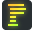

In [5]:
%%pyinstrument
kgs.profiling=True
t = time.time()
runner.run()
print("Elapsed time:", time.time() - t)


In [6]:
kgs.print_module_profile()
